In [21]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [34]:
# Reading the datasets
missing_persons = pd.read_csv('data_files/missing_person_output.csv')
caves = pd.read_csv('data_files/caves_output.csv')
county_pop = pd.read_excel('data_files/county_pop.xlsx')

## Performing preprocessing on the Missing Persons Dataset

In [4]:
missing_persons.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,MP116109\n02/07/2024\nBedreak\nPaul\n16 Years\...,MP116109\n02/07/2024\nBedreak\nPaul\n16 Years\...,MP116109,MP116109,02/07/2024,02/07/2024,Bedreak,Bedreak,Paul,...,Arkansas,Arkansas,AR,AR,Male,Male,Hawaiian / Pacific Islander,Hawaiian / Pacific Islander,02/08/2024,02/08/2024
1,1,MP116133\n02/07/2024\nDillon\nDestiny\n15 Year...,MP116133\n02/07/2024\nDillon\nDestiny\n15 Year...,MP116133,MP116133,02/07/2024,02/07/2024,Dillon,Dillon,Destiny,...,New Haven,New Haven,CT,CT,Female,Female,Black / African American,Black / African American,02/09/2024,02/09/2024
2,2,MP116143\n02/06/2024\nGutierrez\nPaola\n23 Yea...,MP116143\n02/06/2024\nGutierrez\nPaola\n23 Yea...,MP116143,MP116143,02/06/2024,02/06/2024,Gutierrez,Gutierrez,Paola,...,Miami-Dade,Miami-Dade,FL,FL,Female,Female,Hispanic / Latino,Hispanic / Latino,02/09/2024,02/09/2024
3,3,MP116050\n02/06/2024\nZaremba\nSarah\n37 Years...,MP116050\n02/06/2024\nZaremba\nSarah\n37 Years...,MP116050,MP116050,02/06/2024,02/06/2024,Zaremba,Zaremba,Sarah,...,Coconino,Coconino,AZ,AZ,Female,Female,White / Caucasian,White / Caucasian,02/07/2024,02/07/2024
4,4,MP116021\n02/05/2024\nGutierrez\nIziah\n15 Yea...,MP116021\n02/05/2024\nGutierrez\nIziah\n15 Yea...,MP116021,MP116021,02/05/2024,02/05/2024,Gutierrez,Gutierrez,Iziah,...,Bedford,Bedford,TN,TN,Male,Male,Hispanic / Latino,Hispanic / Latino,02/08/2024,02/08/2024


In [5]:
missing_persons = missing_persons[['2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22']]
missing_persons.columns = ['Case', 'DLC', 'Last_Name', 'First_Name', 'Age', 'City', 'County', 'State_Ab', 'Gender', 'Ethnicity', 'Date_Modified']
missing_persons

,Case,DLC,Last_Name,First_Name,Age,City,County,State_Ab,Gender,Ethnicity,Date_Modified
0,MP116109,02/07/2024,Bedreak,Paul,16 Years,Springdale,Arkansas,AR,Male,Hawaiian / Pacific Islander,02/08/2024
1,MP116133,02/07/2024,Dillon,Destiny,15 Years,Derby,New Haven,CT,Female,Black / African American,02/09/2024
2,MP116143,02/06/2024,Gutierrez,Paola,23 Years,North Miami Beach,Miami-Dade,FL,Female,Hispanic / Latino,02/09/2024
3,MP116050,02/06/2024,Zaremba,Sarah,37 Years,Page,Coconino,AZ,Female,White / Caucasian,02/07/2024
4,MP116021,02/05/2024,Gutierrez,Iziah,15 Years,Shelbyville,Bedford,TN,Male,Hispanic / Latino,02/08/2024
...,...,...,...,...,...,...,...,...,...,...,...
7015,MP101412,01/01/2018,Beatty,Sharrita,40 Years,Philadelphia,Philadelphia,PA,Female,Black / African American,11/29/2023
7016,MP101901,01/01/2018,Jefferson,Michael,63 Years,Kansas City,Jackson,MO,Male,Black / African American,10/07/2023
7017,MP106630,01/01/2018,Barker,Beverly,55 Years,Anchorage,Anchorage,AK,Female,American Indian / Alaska Native,01/10/2024
7018,MP57005,01/01/2018,Butler,Steven,66 Years,Many,Sabine,LA,Male,White / Caucasian,05/03/2019


In [6]:
age = []
for i in missing_persons['Age']:
    if i.split(" ")[0] == '<':
        age.append(0)
    else:
        age.append(int(i.split(" ")[0]))

In [7]:
missing_persons.loc[:,'Age'] = age
missing_persons.head()

,Case,DLC,Last_Name,First_Name,Age,City,County,State_Ab,Gender,Ethnicity,Date_Modified
0,MP116109,02/07/2024,Bedreak,Paul,16,Springdale,Arkansas,AR,Male,Hawaiian / Pacific Islander,02/08/2024
1,MP116133,02/07/2024,Dillon,Destiny,15,Derby,New Haven,CT,Female,Black / African American,02/09/2024
2,MP116143,02/06/2024,Gutierrez,Paola,23,North Miami Beach,Miami-Dade,FL,Female,Hispanic / Latino,02/09/2024
3,MP116050,02/06/2024,Zaremba,Sarah,37,Page,Coconino,AZ,Female,White / Caucasian,02/07/2024
4,MP116021,02/05/2024,Gutierrez,Iziah,15,Shelbyville,Bedford,TN,Male,Hispanic / Latino,02/08/2024


In [8]:
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [39]:
us_states = pd.DataFrame(state_dict.items(), columns = ['Abbreviation', 'Full Form'])
us_states.to_csv('data_files/us_states.csv', index = False)

In [8]:
missing_persons.loc[:, 'State'] = missing_persons.loc[:, 'State_Ab'].map(state_dict)
missing_persons.drop(columns = ['State_Ab'], inplace = True)
missing_persons['DLC'] = pd.to_datetime(missing_persons['DLC'])
missing_persons

,Case,DLC,Last_Name,First_Name,Age,City,County,Gender,Ethnicity,Date_Modified,State
0,MP116109,2024-02-07,Bedreak,Paul,16,Springdale,Arkansas,Male,Hawaiian / Pacific Islander,02/08/2024,Arkansas
1,MP116133,2024-02-07,Dillon,Destiny,15,Derby,New Haven,Female,Black / African American,02/09/2024,Connecticut
2,MP116143,2024-02-06,Gutierrez,Paola,23,North Miami Beach,Miami-Dade,Female,Hispanic / Latino,02/09/2024,Florida
3,MP116050,2024-02-06,Zaremba,Sarah,37,Page,Coconino,Female,White / Caucasian,02/07/2024,Arizona
4,MP116021,2024-02-05,Gutierrez,Iziah,15,Shelbyville,Bedford,Male,Hispanic / Latino,02/08/2024,Tennessee
...,...,...,...,...,...,...,...,...,...,...,...
7015,MP101412,2018-01-01,Beatty,Sharrita,40,Philadelphia,Philadelphia,Female,Black / African American,11/29/2023,Pennsylvania
7016,MP101901,2018-01-01,Jefferson,Michael,63,Kansas City,Jackson,Male,Black / African American,10/07/2023,Missouri
7017,MP106630,2018-01-01,Barker,Beverly,55,Anchorage,Anchorage,Female,American Indian / Alaska Native,01/10/2024,Alaska
7018,MP57005,2018-01-01,Butler,Steven,66,Many,Sabine,Male,White / Caucasian,05/03/2019,Louisiana


## Performing preprocessing on the Caves Dataset

In [9]:
caves.head()

,Unnamed: 0,Type,Rank,Cave_Name,County,Length_Mi,Lenght_Me,Depth_Ft,Depth_Me,Source,Date,State
0,1,-,1,Fern Cave (597),Jackson,15.630,25154.05,536.0,163.37,Fern Cave Project,6/17/2022,Alabama
1,2,-,2,Anvil Cave (279),Morgan,12.667,20385.56,51.0,15.54,Alabama Cave Survey,4/1/1980,Alabama
2,3,-,3,Russell Cave (N.M.) (169),Jackson,11.605,18675.71,405.8,123.70,Jason Richards,11/17/2022,Alabama
3,4,-,4,Guffey Cave (317),Marshall,6.198,9974.71,210.0,64.01,Alabama Cave Survey,6/16/2022,Alabama
4,5,-,5,Tumbling Rock Cave (171) (Saltpeter),Jackson,6.022,9691.47,454.0,138.38,Georgia Underground V32N4P38],9/1/1996,Alabama


In [10]:
caves = caves.loc[:, ['Cave_Name', 'County', 'Length_Mi', 'Lenght_Me', 'Depth_Ft', 'Depth_Me', 'State']]
caves.rename(columns={'Lenght_Me':'Length_Me'}, inplace=True)
caves

,Cave_Name,County,Length_Mi,Length_Me,Depth_Ft,Depth_Me,State
0,Fern Cave (597),Jackson,15.630,25154.05,536.0,163.37,Alabama
1,Anvil Cave (279),Morgan,12.667,20385.56,51.0,15.54,Alabama
2,Russell Cave (N.M.) (169),Jackson,11.605,18675.71,405.8,123.70,Alabama
3,Guffey Cave (317),Marshall,6.198,9974.71,210.0,64.01,Alabama
4,Tumbling Rock Cave (171) (Saltpeter),Jackson,6.022,9691.47,454.0,138.38,Alabama
...,...,...,...,...,...,...,...
2130,Bad Medicine Cave,Big Horn,1.910,3073.85,472.0,143.87,Wyoming
2131,P-Bar (PeBar) Cave,Big Horn,1.851,2978.90,486.0,148.13,Wyoming
2132,Tongue River Cave(rns),Sheridan,1.283,2064.79,106.0,32.31,Wyoming
2133,Loaded Dice Cave,Teton,1.048,1687.23,1395.7,425.42,Wyoming


## Performing preprocessing on the County Population Dataset

In [47]:
county_pop.head()

,County,2019,2020,2021,2022
0,".Autauga County, Alabama",58802,58902,59210,59759
1,".Baldwin County, Alabama",231761,233219,239361,246435
2,".Barbour County, Alabama",25224,24960,24539,24706
3,".Bibb County, Alabama",22300,22183,22370,22005
4,".Blount County, Alabama",59130,59102,59085,59512


In [ ]:
county = []
state = []
for i in county_pop.loc[:, 'County']:
    state.append(i.split(', ')[1])
    county.append((i.split(', ')[0])[1:])
county

In [ ]:
names_delete = ['County', 'Borough', 'Area', 'Census', 'Municipality', 'Region', 'Planning']
for i in enumerate(county):
    if county[i[0]].split()[-1] in names_delete:
        county[i[0]] = " ".join(county[i[0]].split()[:-1])
county

In [14]:
county_pop['County'] = county
county_pop['State'] = state
county_pop.head()

,County,2019,2020,2021,2022,State
0,Autauga,58802,58902,59210,59759,Alabama
1,Baldwin,231761,233219,239361,246435,Alabama
2,Barbour,25224,24960,24539,24706,Alabama
3,Bibb,22300,22183,22370,22005,Alabama
4,Blount,59130,59102,59085,59512,Alabama


## Data Analysis

In [15]:
combined_caves_county_pop = pd.merge(caves, county_pop, on = ['County', 'State'])
combined_caves_county_pop

,Cave_Name,County,Length_Mi,Length_Me,Depth_Ft,Depth_Me,State,2019,2020,2021,2022
0,Fern Cave (597),Jackson,15.630,25154.05,536.0,163.37,Alabama,52582,52545,52694,52891
1,Anvil Cave (279),Morgan,12.667,20385.56,51.0,15.54,Alabama,123421,123288,123403,124211
2,Russell Cave (N.M.) (169),Jackson,11.605,18675.71,405.8,123.70,Alabama,52582,52545,52694,52891
3,Guffey Cave (317),Marshall,6.198,9974.71,210.0,64.01,Alabama,97611,97696,98316,99423
4,Tumbling Rock Cave (171) (Saltpeter),Jackson,6.022,9691.47,454.0,138.38,Alabama,52582,52545,52694,52891
...,...,...,...,...,...,...,...,...,...,...,...
1620,Bad Medicine Cave,Big Horn,1.910,3073.85,472.0,143.87,Wyoming,11521,11481,11645,11855
1621,P-Bar (PeBar) Cave,Big Horn,1.851,2978.90,486.0,148.13,Wyoming,11521,11481,11645,11855
1622,Tongue River Cave(rns),Sheridan,1.283,2064.79,106.0,32.31,Wyoming,30925,31005,31667,32096
1623,Loaded Dice Cave,Teton,1.048,1687.23,1395.7,425.42,Wyoming,23323,23377,23622,23287


In [17]:
# For numeric columns
combined_caves_county_pop.describe()

,Length_Mi,Length_Me,Depth_Ft,Depth_Me,2019,2020,2021,2022
count,1625.000000,1625.000000,1625.000000,1625.000000,1.625000e+03,1.625000e+03,1.625000e+03,1.625000e+03
mean,2.963488,4769.194860,164.321538,50.048497,8.853071e+04,8.865589e+04,8.947151e+04,9.031079e+04
std,9.417739,15156.384382,254.048611,77.348271,1.619800e+05,1.623975e+05,1.634992e+05,1.652179e+05
min,0.000000,0.000000,0.000000,0.000000,2.620000e+02,2.660000e+02,2.560000e+02,2.330000e+02
25%,0.705000,1135.000000,0.000000,0.000000,1.848900e+04,1.853300e+04,1.883700e+04,1.885800e+04
50%,1.293000,2081.330000,88.000000,26.820000,4.043900e+04,4.040500e+04,4.015600e+04,4.033500e+04
75%,2.389000,3844.720000,210.000000,64.010000,1.043490e+05,1.048620e+05,1.087250e+05,1.118140e+05
max,212.430000,341872.940000,3613.800000,1101.500000,2.269667e+06,2.274734e+06,2.295194e+06,2.322985e+06


In [18]:
# To understand distribution of gender in missing persons
missing_persons['Gender'].value_counts()

Gender
Male      4501
Female    2513
Other        6
Name: count, dtype: int64

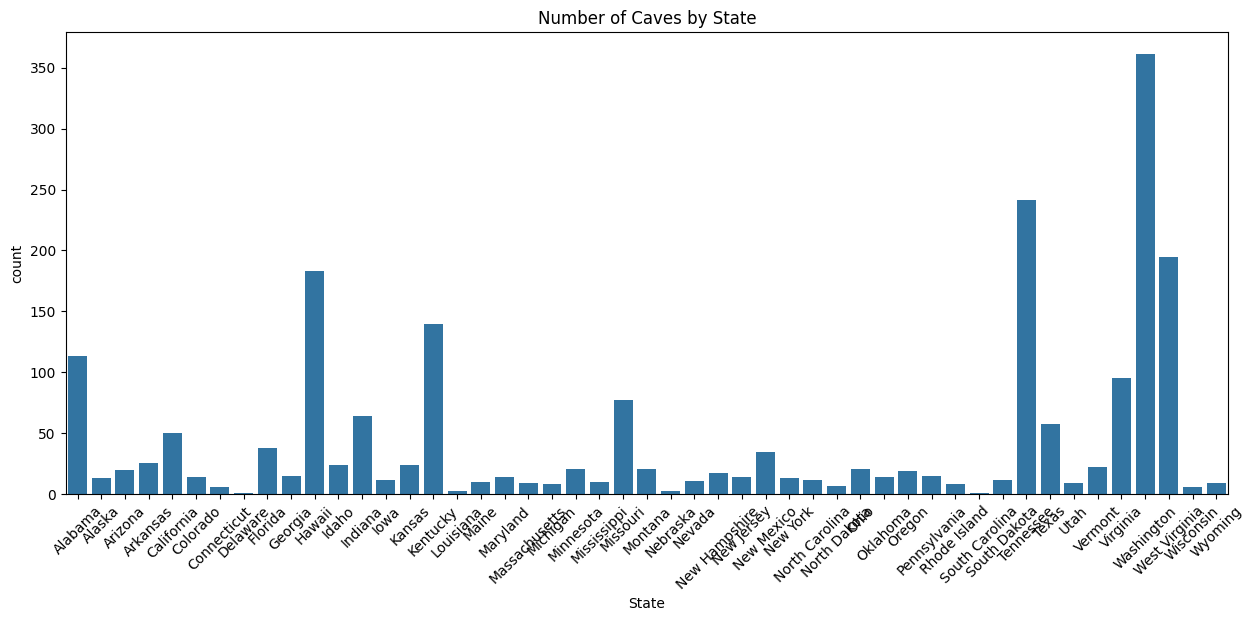

In [21]:
# Visualize the distribution of caves by state
plt.figure(figsize=(15,6))
sns.countplot(data=caves, x='State')
plt.xticks(rotation=45)
plt.title('Number of Caves by State')
plt.show()

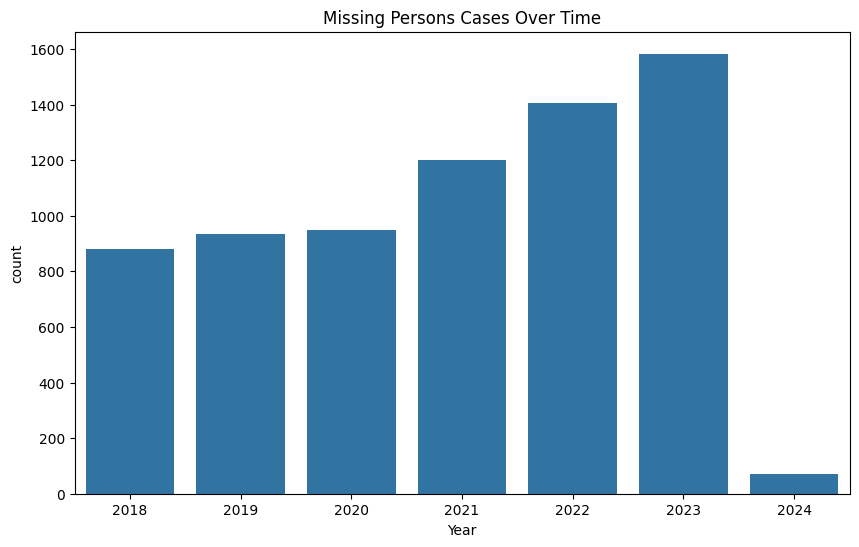

In [22]:
# Visualize missing persons cases over time
missing_persons['Year'] = missing_persons['DLC'].dt.year
plt.figure(figsize=(10,6))
sns.countplot(data=missing_persons, x='Year')
plt.title('Missing Persons Cases Over Time')
plt.show()

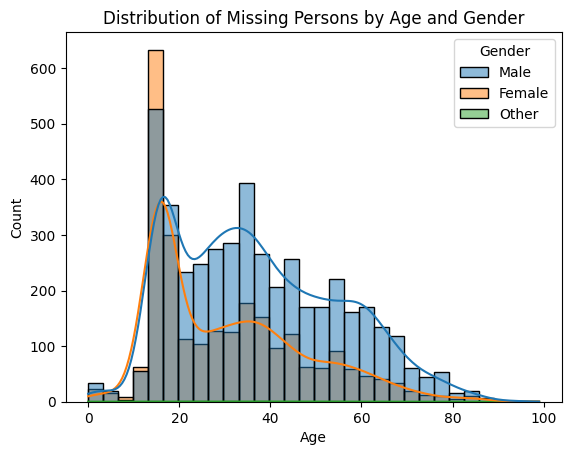

In [23]:
# Analyze missing persons distribution by age and gender
sns.histplot(data=missing_persons, x='Age', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Missing Persons by Age and Gender')
plt.show()

In [24]:
# Aggregate Caves Data: Count the number of caves by county
caves_per_county = caves.groupby(['County', 'State']).size().reset_index(name='Cave_Count')

In [25]:
# Aggregate Missing Persons Data: Count missing persons by county
missing_per_county = missing_persons.groupby(['County', 'State']).size().reset_index(name='Missing_Count')

In [26]:
# Merging caves data
analysis_df = pd.merge(county_pop, caves_per_county, on=['County', 'State'], how='left').fillna(0)

# Merging missing persons data
analysis_df = pd.merge(analysis_df, missing_per_county, on=['County', 'State'], how='left').fillna(0)

In [28]:
# Normalize the number of missing persons and caves by the population of each county
analysis_df['Missing_per_100k'] = (analysis_df['Missing_Count'] / analysis_df[2022]) * 100000
analysis_df['Caves_per_100k'] = (analysis_df['Cave_Count'] / analysis_df[2022]) * 100000

In [30]:
correlation_matrix = analysis_df[['Missing_per_100k', 'Caves_per_100k']].corr()
correlation_matrix

,Missing_per_100k,Caves_per_100k
Missing_per_100k,1.000000,0.024867
Caves_per_100k,0.024867,1.000000


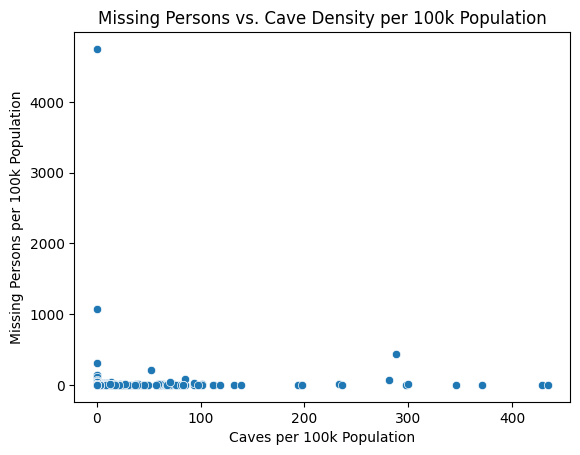

In [31]:
sns.scatterplot(data=analysis_df, x='Caves_per_100k', y='Missing_per_100k')
plt.title('Missing Persons vs. Cave Density per 100k Population')
plt.xlabel('Caves per 100k Population')
plt.ylabel('Missing Persons per 100k Population')
plt.show()

In [34]:
# Splitting the DataFrame into two groups: counties with caves and without caves
with_caves_missing = analysis_df[analysis_df['Cave_Count'] > 0]['Missing_per_100k']
without_caves_missing = analysis_df[analysis_df['Cave_Count'] == 0]['Missing_per_100k']

# Performing a t-test
t_stat, p_value = ttest_ind(with_caves_missing, without_caves_missing)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.12574412944691507, P-value: 0.8999425137928545


In [39]:
# Separate counties with and without caves
with_caves = analysis_df[analysis_df.loc[:, 'Caves_per_100k'] > 0]
without_caves = analysis_df[analysis_df.loc[:, 'Caves_per_100k'] <= 0]

# For those with caves, dynamically create bins based on their distribution
# Example: using percentiles that definitely split the data
bins = [-np.inf, with_caves.loc[:, 'Caves_per_100k'].quantile(0.5), np.inf]
labels = ['Lower Half', 'Upper Half']

with_caves.loc[:, 'Cave_Density_Category'] = pd.cut(with_caves.loc[:, 'Caves_per_100k'], bins=bins, labels=labels)

# Re-integrate the without_caves with a label indicating 'No Caves'
without_caves.loc[:, 'Cave_Density_Category'] = 'No Caves'
analysis_df = pd.concat([with_caves, without_caves])

# Calculate average missing persons rate per 100k for each category
avg_missing_by_density = analysis_df.groupby('Cave_Density_Category')['Missing_per_100k'].mean().reset_index()

print(avg_missing_by_density)

  Cave_Density_Category  Missing_per_100k
0            Lower Half          2.245183
1              No Caves          4.281426
2            Upper Half          7.539303


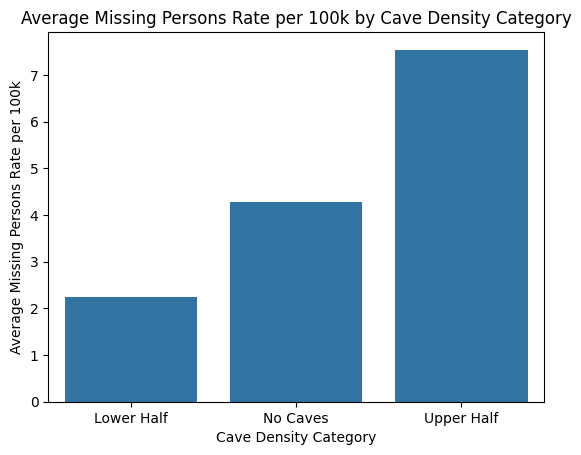

In [37]:
sns.barplot(data=avg_missing_by_density, x='Cave_Density_Category', y='Missing_per_100k')
plt.title('Average Missing Persons Rate per 100k by Cave Density Category')
plt.xlabel('Cave Density Category')
plt.ylabel('Average Missing Persons Rate per 100k')
plt.show()